In [61]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Q1 Read the input file and check the data dimension

In [37]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [38]:
credit=pd.read_csv('german_credit.csv')
credit.head().T

,0,1,2,3,4
default,0,1,0,0,1
account_check_status,< 0 DM,0 <= ... < 200 DM,no checking account,< 0 DM,< 0 DM
duration_in_month,6,48,12,42,24
credit_history,critical account/ other credits existing (not ...,existing credits paid back duly till now,critical account/ other credits existing (not ...,existing credits paid back duly till now,delay in paying off in the past
purpose,domestic appliances,domestic appliances,(vacation - does not exist?),radio/television,car (new)
credit_amount,1169,5951,2096,7882,4870
savings,unknown/ no savings account,... < 100 DM,... < 100 DM,... < 100 DM,... < 100 DM
present_emp_since,.. >= 7 years,1 <= ... < 4 years,4 <= ... < 7 years,4 <= ... < 7 years,1 <= ... < 4 years
installment_as_income_perc,4,2,2,2,3
personal_status_sex,male : single,female : divorced/separated/married,male : single,male : single,male : single


In [39]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [40]:
credit.shape

(1000, 21)

In [41]:
#Understanding the unique values for each categorical variable
for feature in credit.columns: # Loop through all columns in the dataframe
    if credit[feature].dtype == 'object': # Only apply for columns with categorical strings
        print('\n Feature: ',feature, '\n',credit[feature].value_counts())


 Feature:  account_check_status 
 no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

 Feature:  credit_history 
 existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64

 Feature:  purpose 
 domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
repairs            

###### There are many features which should be ordered while converting to integer but not all. 

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [46]:
credit_df=pd.get_dummies(credit,prefix=credit.select_dtypes(exclude=np.number).columns,drop_first=True)

In [48]:
credit_df.head().T

,0,1,2,3,4
default,0,1,0,0,1
duration_in_month,6,48,12,42,24
credit_amount,1169,5951,2096,7882,4870
installment_as_income_perc,4,2,2,2,3
present_res_since,4,2,3,4,4
age,67,22,49,45,53
credits_this_bank,2,1,1,1,2
people_under_maintenance,1,1,2,2,2
account_check_status_< 0 DM,1,0,0,1,1
account_check_status_>= 200 DM / salary assignments for at least 1 year,0,0,0,0,0


In [49]:
# Print Shape of model data
credit_df.shape

(1000, 49)

we can see here that column nos has increased from 21 to 49. 

### Check for highly correlated variables but don't required any treatment for this use case

In [50]:
credit_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.258333,-0.044009,...,0.125750,-0.113285,0.050523,-0.134589,0.092785,-0.013559,0.005951,-0.021822,-0.036466,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.044009,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392


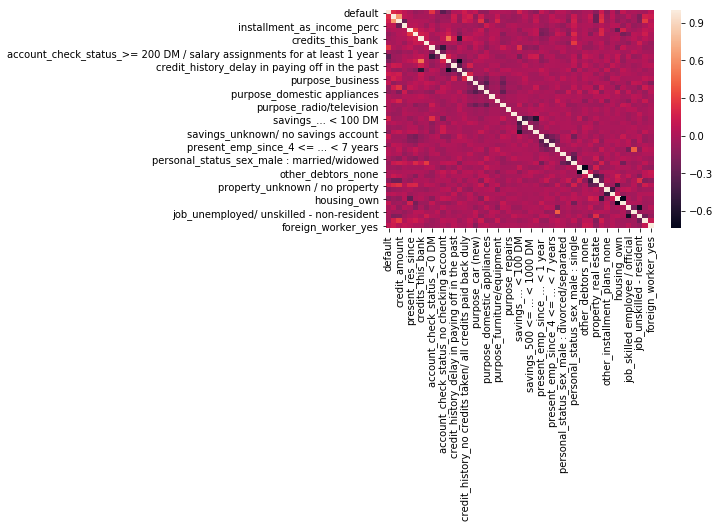

In [51]:
sns.heatmap(credit_df.corr())

As we see, none of the feature is highly corelated with Default target variable. 

### Drop the original variables which are converted to dummy

It gets dropped automatically when we use get_dummies function with drop_first = True. 

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [53]:
#First creating X and Y
X=credit_df.drop('default', axis =1)

In [54]:
X.shape

(1000, 48)

In [55]:
y=credit_df['default']

In [56]:
y.shape

(1000,)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30,random_state=10  )

In [58]:
print('train data shape: ', X_train.shape , y_train.shape)
print('test data shape: ', X_test.shape , y_test.shape)

train data shape:  (700, 48) (700,)
test data shape:  (300, 48) (300,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [64]:
RFC1=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion='entropy',random_state=9999)
RFC1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [65]:
print('Confusion Matrix using Random Forest Model:')
print(metrics.confusion_matrix(y_test, RFC1.predict(X_test)))

Confusion Matrix using Random Forest Model:
[[190  13]
 [ 66  31]]


In [67]:
print('Train accuracy score:', RFC1.score(X_train,y_train))
print('Test accuracy score:', RFC1.score(X_test,y_test))

Train accuracy score: 1.0
Test accuracy score: 0.7366666666666667


Since we haven't regularized the decision tree model, it is overfitting the model

In [68]:
print('classification report:')
print(metrics.classification_report(y_test, RFC1.predict(X_test)))

classification report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       203
           1       0.70      0.32      0.44        97

   micro avg       0.74      0.74      0.74       300
   macro avg       0.72      0.63      0.63       300
weighted avg       0.73      0.74      0.70       300



### Q6 Show the list of the features importance( 1 Marks)

In [75]:
features_imp = list(RFC1.feature_importances_)
features = list(X.columns)

In [79]:
f_df=pd.DataFrame(data={'features':features, 'features_imp':features_imp})

In [82]:
f_df.sort_values(by='features_imp',ascending=False)

,features,features_imp
1,credit_amount,0.112520
4,age,0.088886
0,duration_in_month,0.081300
9,account_check_status_no checking account,0.064954
2,installment_as_income_perc,0.040345
3,present_res_since,0.038984
7,account_check_status_< 0 DM,0.038526
39,other_installment_plans_none,0.025953
23,savings_... < 100 DM,0.023696
10,credit_history_critical account/ other credits...,0.022165


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [85]:
# Use below values
num_folds = 10
seed = 77

In [91]:
#First regularizing the model to avoid overfitting.
myList = list(range(1,20))
# empty list that will hold cv scores
cv_scores = []
max_depth_values = []
for d in myList:
    rfc2 = RandomForestClassifier(n_estimators=seed,criterion='entropy', max_depth= d, random_state=9999)
    scores = cross_val_score(rfc2, X_train, y_train, cv=num_folds, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_depth_values.append(d)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_depth = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth is %d" % best_depth)

The optimal number of max_depth is 15


In [98]:
depth_df=pd.DataFrame(data={'depth':max_depth_values, 'MSE':MSE})
depth_df.sort_values(by='MSE')

,depth,MSE
14,15,0.232722
17,18,0.235661
9,10,0.235723
18,19,0.237029
13,14,0.237133
15,16,0.239969
16,17,0.239988
11,12,0.239988
7,8,0.241438
12,13,0.244314


In [107]:
#Using best depth value
rfc3 = RandomForestClassifier(n_estimators=seed,criterion='entropy', max_depth= 15, random_state=9999)
rfc3.fit(X_train, y_train)
print('Train score:',rfc3.score(X_train,y_train))
print('Test score:',rfc3.score(X_test,y_test))

Train score: 1.0
Test score: 0.7433333333333333


In [108]:
#depth=15 is giving overfitting hence trying next best depth
rfc3 = RandomForestClassifier(n_estimators=seed,criterion='entropy', max_depth= 18, random_state=9999)
rfc3.fit(X_train, y_train)
print('Train score:',rfc3.score(X_train,y_train))
print('Test score:',rfc3.score(X_test,y_test))

Train score: 1.0
Test score: 0.7466666666666667


In [109]:
#depth=18 is also giving overfitting hence trying next best depth
rfc3 = RandomForestClassifier(n_estimators=seed,criterion='entropy', max_depth= 10, random_state=9999)
rfc3.fit(X_train, y_train)
print('Train score:',rfc3.score(X_train,y_train))
print('Test score:',rfc3.score(X_test,y_test))

Train score: 0.9714285714285714
Test score: 0.7266666666666667


max_depth =10 is the optimal value for it. Hence will use this as final model. 

In [110]:
#Validate the Random Forest model build above using k fold
scores = cross_val_score(rfc3, X_train, y_train, cv=num_folds, scoring='accuracy')
scores

array([0.78873239, 0.78873239, 0.71830986, 0.74285714, 0.77142857,
       0.77142857, 0.77142857, 0.73913043, 0.73913043, 0.8115942 ])

In [111]:
#Calculate Mean score
scores.mean()

0.7642772577493949

In [112]:
# Calculate score standard deviation using std()
scores.std()

0.027248803717485625

# Q8 Print the confusion matrix( 1 Marks)

In [113]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, rfc3.predict(X_test)))

Confusion Matrix:
[[193  10]
 [ 72  25]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [114]:
print('classification report:')
print(metrics.classification_report(y_test, rfc3.predict(X_test)))

classification report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       203
           1       0.71      0.26      0.38        97

   micro avg       0.73      0.73      0.73       300
   macro avg       0.72      0.60      0.60       300
weighted avg       0.72      0.73      0.68       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

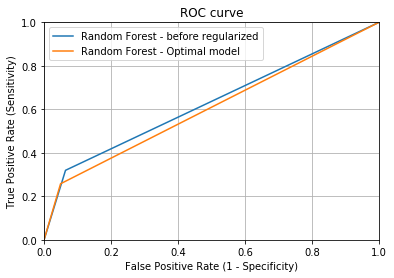

In [118]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, RFC1.predict(X_test))
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, rfc3.predict(X_test))
plt.plot(fpr1, tpr1,label='Random Forest - before regularized')
plt.plot(fpr3, tpr3,label='Random Forest - Optimal model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [120]:
print('AUC Score for model before regularized:' , metrics.auc(fpr1, tpr1))
print('AUC Score for optimal model:' , metrics.auc(fpr3, tpr3))

AUC Score for model before regularized: 0.6277741099994921
AUC Score for optimal model: 0.604235437509522


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [121]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [123]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfc3.fit(X_, y_)
    y_pred = rfc3.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [124]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7326666666666666
Standard deviation:  0.01209223809814471
